# Predicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score

In [4]:
df = pd.read_csv('heart.csv')

In [6]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

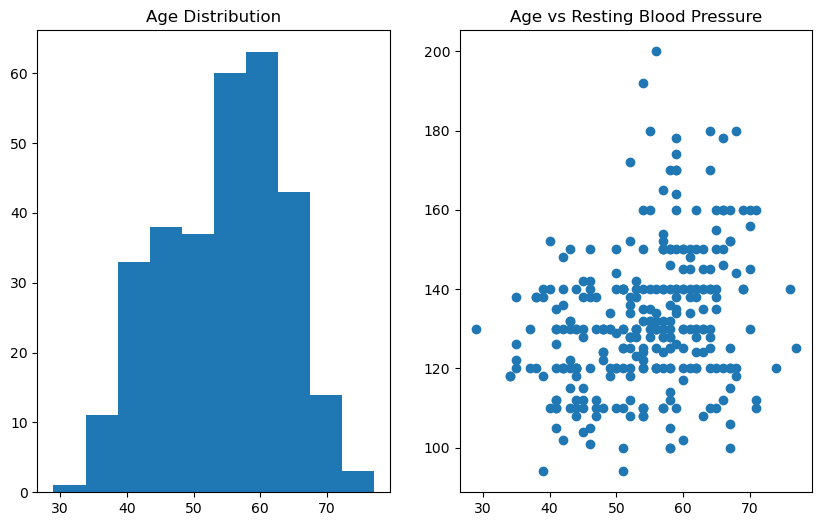

In [8]:
# Univariate and bivariate analysis
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=10)
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
plt.scatter(df['age'], df['trestbps'])
plt.title('Age vs Resting Blood Pressure')
plt.show()

In [10]:
# Find the correlation
corr_matrix = df.corr()
print(corr_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

In [12]:
# Split the dataset into features and target
X = df.drop('target', axis=1)
y = df['target']

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8688524590163934


In [24]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8360655737704918


In [20]:
# Model evaluation
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))
print('Naive Bayes ROC Score:', roc_auc_score(y_test, y_pred_nb))
print('Naive Bayes Recall:', recall_score(y_test, y_pred_nb))
print('Naive Bayes Precision:', precision_score(y_test, y_pred_nb))
print('Naive Bayes F1 Score:', f1_score(y_test, y_pred_nb))

Naive Bayes Confusion Matrix:
[[26  3]
 [ 5 27]]
Naive Bayes ROC Score: 0.8701508620689655
Naive Bayes Recall: 0.84375
Naive Bayes Precision: 0.9
Naive Bayes F1 Score: 0.8709677419354839


In [22]:
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Random Forest ROC Score:', roc_auc_score(y_test, y_pred_rf))
print('Random Forest Recall:', recall_score(y_test, y_pred_rf))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf))
print('Random Forest F1 Score:', f1_score(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[24  5]
 [ 3 29]]
Random Forest ROC Score: 0.8669181034482758
Random Forest Recall: 0.90625
Random Forest Precision: 0.8529411764705882
Random Forest F1 Score: 0.8787878787878788
